## LIMPIEZA, TRANSFORMACIÓN Y ANÁLISIS COBIFY:
En primer lugar, importamos las librerías necesarias para la limpieza, visualización y análisis de los datos aportados:

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [17]:
# Cargamos los datasets dados:

df = pd.read_csv('data/measurements.csv')
df2 = pd.read_excel('data/measurements2.xlsx')

In [6]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [18]:
df2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [12]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 146.0 KB


In [19]:
df2.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 77.6 KB


Como podemos observar, el segundo dataset tiene los tipos de datos mejor ajustados y requiere menos limpieza en cuanto a ello, así que dado que por lo demás, son aparentemente iguales, nos quedaremos con el segundo.

In [20]:
df = df2

In [23]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [25]:
df.specials.value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [26]:
# Eliminamos la columna de specials al existir las columnas AC, Rain, Sun
df.drop(columns='specials', inplace=True)

In [27]:
df.dropna(subset=['temp_inside'], inplace=True)
df.drop(columns=['refill liters','refill gas'], inplace=True)

In [28]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [30]:
df.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [31]:
df = pd.get_dummies(df, columns=['gas_type'])

In [32]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,True,False
1,12.0,4.2,30,21.5,13,0,0,0,True,False
2,11.2,5.5,38,21.5,15,0,0,0,True,False
3,12.9,3.9,36,21.5,14,0,0,0,True,False
4,18.5,4.5,46,21.5,15,0,0,0,True,False


In [33]:
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
distance,1.000000,-0.131379,0.565505,0.075305,0.086774,-0.027670,-0.022129,0.078627,0.047877,-0.047877
consume,-0.131379,1.000000,-0.234537,-0.161991,-0.318758,0.093892,0.247699,-0.169173,0.020928,-0.020928
speed,0.565505,-0.234537,1.000000,0.059725,0.019327,-0.036351,-0.002936,0.077181,0.099495,-0.099495
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120,-0.010340,0.010340
temp_outside,0.086774,-0.318758,0.019327,0.361308,1.000000,0.169374,-0.185731,0.349988,-0.156990,0.156990
AC,-0.027670,0.093892,-0.036351,0.297775,0.169374,1.000000,0.244848,0.090164,-0.109996,0.109996
rain,-0.022129,0.247699,-0.002936,-0.037356,-0.185731,0.244848,1.000000,-0.113298,-0.059112,0.059112
sun,0.078627,-0.169173,0.077181,0.246120,0.349988,0.090164,-0.113298,1.000000,-0.038120,0.038120
gas_type_E10,0.047877,0.020928,0.099495,-0.010340,-0.156990,-0.109996,-0.059112,-0.038120,1.000000,-1.000000
gas_type_SP98,-0.047877,-0.020928,-0.099495,0.010340,0.156990,0.109996,0.059112,0.038120,-1.000000,1.000000


<Axes: >

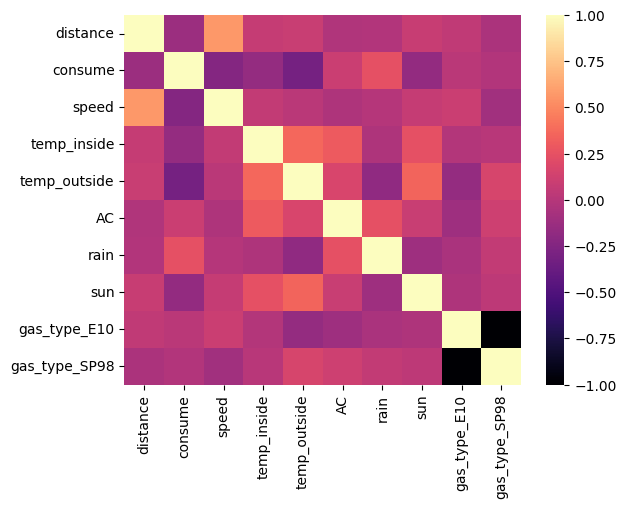

In [36]:
sns.heatmap(df.corr(),cmap='magma')

In [38]:
col_num = ['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun', 'gas_type_E10', 'gas_type_SP98']
X = pd.concat([df, df[col_num]], axis=1)
y = df['consume']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = model.score(X_test, y_test)
print(r2)

2.451177667999236e-29
1.0
